# 项目简介

In [110]:
# Type								交易方式（DEBIT, TRANSFER, CASH, PAYMENT)
# Days for shipping (real)			实际发货天数
# Days for shipment (scheduled)		预计发货天数
# Benefit per order					每笔订单利润（可能为正，也可能为负）
# Sales per customer					每个顾客的总销售额
# Delivery Status						交货状态（Advance shipping,Late delivery,Shipping on time,Shipping canceled ... ）
# Late_delivery_risk					分类变量，说明发货是否延迟，1：延迟，0：没有延迟
# Category Id							商品类别ID
# Category Name						商品类别名称
# Customer City						客户所在城市
# Customer Country					客户所在国家
# Customer Email						客户Email（已隐去）
# Customer Fname						客户First Name
# Customer Lname						客户Last Name
# Customer Id							客户ID
# Customer Password					客户Password（已隐去）
# Customer Segment					客户划分（Consumer, Home Office, Corporate, ...）
# Customer State						客户所在国家或州（State）
# Customer Street						客户所在街道
# Customer Zipcode					客户所在邮编
# Department Id						商店的部门ID
# Department Name						商店的部门名称（比如Fitness, Golf, Footwear ...）
# Delivery Status						交货状态（Advance shipping, Late delivery, Shipping on time, Shipping canceled ... ）
# Latitude							经度
# Longitude							纬度
# Market								所属市场（比如Pacific Asia, USCA, Africa, Europe ...）
# Order City							订单所在城市
# Order Country						订单所在国家
# Order Customer Id					订单的客户ID
# order date (DateOrders)				订单下单日期（精确到分钟，比如 1/31/2018 22:56）
# Order Item Id						订单商品ID
# Order Item Product Price			订单商品的价格
# Order Item Profit Ratio				订单商品的利润率
# Order Item Quantity					订单商品的数量
# Sales								销售额
# Order Item Total					订单总金额
# Order Profit Per Order				订单利润
# Order Region						订单所属区域
# Order State							订单所在州
# Order Status						订单状态（COMPLETE, PENDING, CLOSED, ...）
# Order Zipcode						订单的邮编
# Product Card Id						商品ID
# Product Category Id					商品分类ID
# Product Description					商品描述
# Product Image						商品图片
# Product Status						商品状态
# shipping date (DateOrders)			发货日期（比如2/3/2018 22:56）
# Shipping Mode						发货方式（比如Standard Class, First Class, ... ）

# 导入函数工具箱

In [16]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

import missingno as msno


# 数据读取

In [2]:


# 数据加载
dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape')
dataset


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


## 数据简要浏览

In [3]:

## 输出数据的大小信息
dataset.shape

(180519, 53)

##  数据信息查看

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

## 数据统计信息浏览

In [5]:
## 查看数值特征列的一些统计信息
dataset.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0



## 查看缺失值

In [6]:
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

##  columns处理

In [7]:
dataset.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [8]:
# 合并firstname lastname
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name','Customer Fname','Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


# 数据探索

## 数据可视化

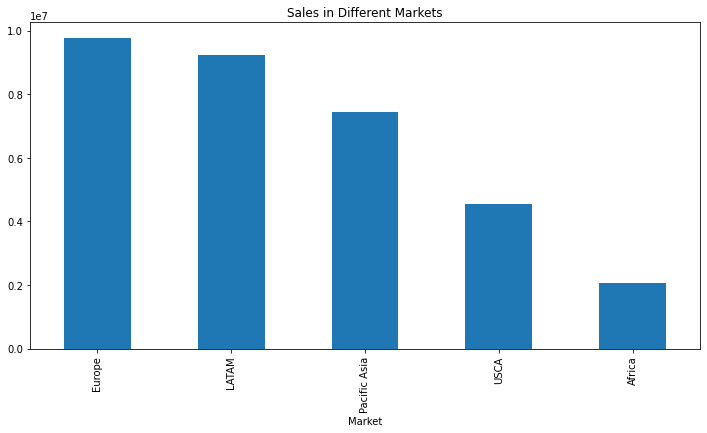

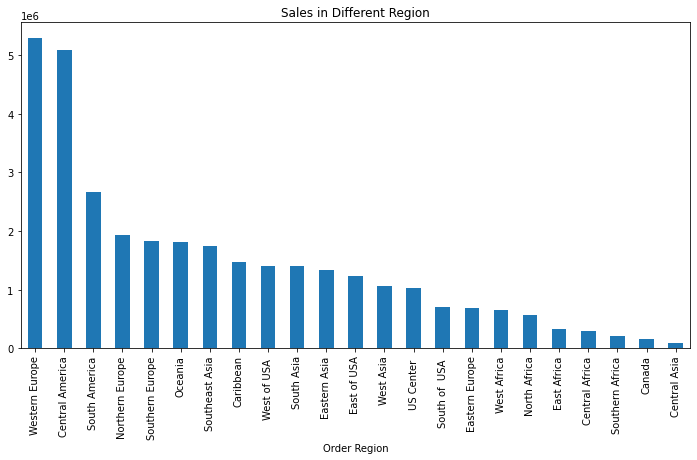

In [9]:
# 对于销售额进行探索（对应 Sales per customer）
# 所属市场（比如Pacific Asia, USCA, Africa, Europe ...）
market = dataset.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(12, 6), title = 'Sales in Different Markets')
plt.show()

# 订单所属区域
region = dataset.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(12, 6), title = 'Sales in Different Region')
plt.show()


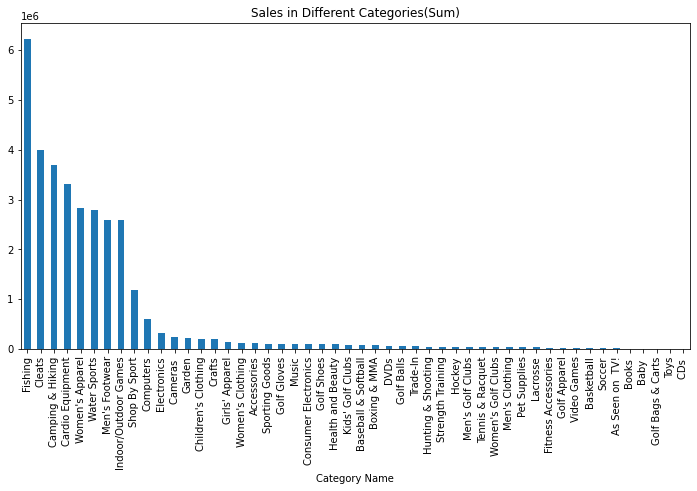

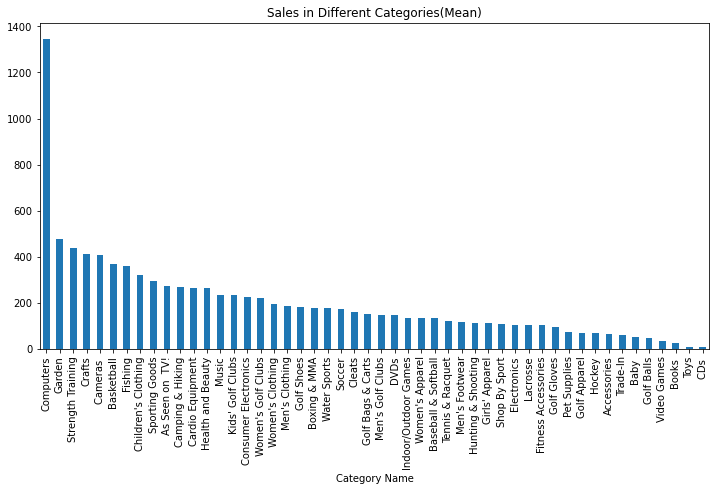

In [13]:
# 按照不同的 类别名称 探索

cat = dataset.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(12, 6), title = 'Sales in Different Categories(Sum)')
plt.show()

cat['Sales per customer'].mean().sort_values(ascending = False).plot.bar(figsize=(12, 6), title = 'Sales in Different Categories(Mean)')
plt.show()


In [10]:

# 按照不同的时间维度（年，月，星期，小时）的趋势
date = pd.DatetimeIndex(dataset['order date (DateOrders)'])

dataset['order_year'] = date.year
dataset['order_month'] = date.month
dataset['order_weekday'] = date.weekday
dataset.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_weekday
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5


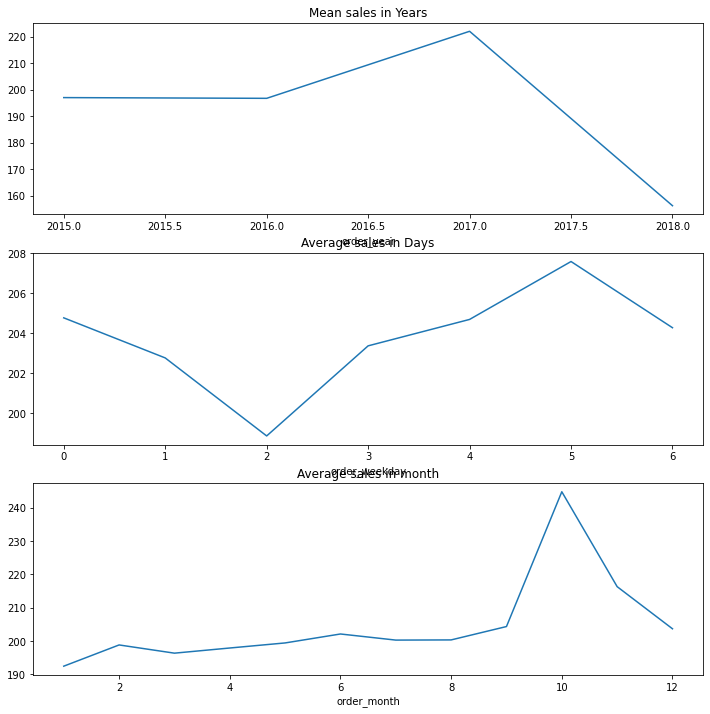

In [11]:
plt.subplot(3, 1, 1)
df_year = dataset.groupby('order_year')
df_year['Sales'].mean().plot(figsize = (12, 12), title='Mean sales in Years')

plt.subplot(3, 1, 2)
df_weekday = dataset.groupby('order_weekday')
df_weekday['Sales'].mean().plot(figsize = (12, 12), title='Average sales in Days')

plt.subplot(3, 1, 3)
df_month = dataset.groupby('order_month')
df_month['Sales'].mean().plot(figsize = (12, 12), title='Average sales in month')


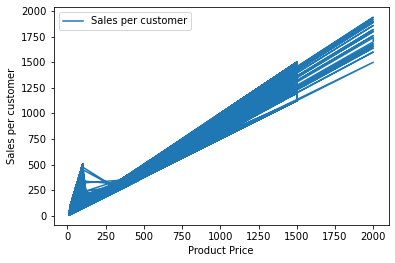

In [12]:
# Product Price 与 Sales per customer 相关性如何
dataset.plot(x='Product Price',y='Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')
plt.show()

## 查看数据缺失值

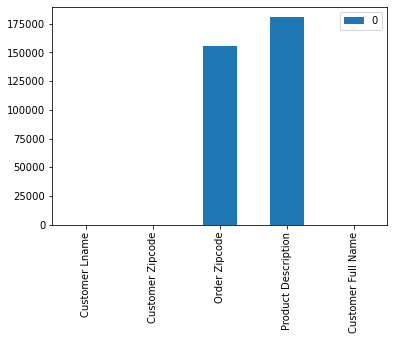

In [16]:

temp= dataset.isnull().sum()
temp = pd.DataFrame(temp)
temp= temp[temp[0]>0]
temp
temp.plot.bar()

## 根据数据报告特征处理

### 缺失值处理

In [13]:
# 缺失值 'Customer Zipcode','Customer Lname'填充众数
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0],inplace = True)
dataset['Customer Lname'].fillna(dataset['Customer Lname'].mode()[0],inplace = True)


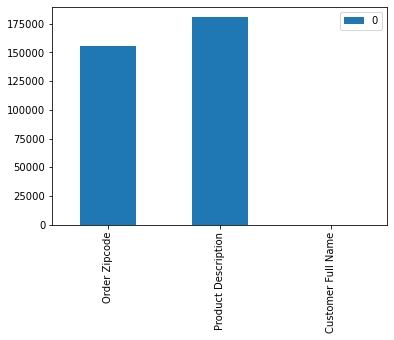

In [14]:

temp= dataset.isnull().sum()
temp = pd.DataFrame(temp)
temp= temp[temp[0]>0]
temp
temp.plot.bar()

### 日期值处理

In [15]:
dataset['order date (DateOrders)'] = pd.to_datetime(dataset['order date (DateOrders)'])
dataset['order date (DateOrders)']

0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order date (DateOrders), Length: 180519, dtype: datetime64[ns]

In [141]:
# 最后一笔订单的时间
dataset['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

## RFM值计算

In [142]:
import datetime
# 假定当前时刻 为最后交易时刻 2018.2.1
present = datetime.datetime(2018,2,1)


# RFM 计算
customer_seg = dataset.groupby('Customer Id').agg({'order date (DateOrders)':lambda x :(present - x.max()).days,
                              'Order Id':lambda x : len(x),
                              'Sales' : lambda x: x.sum()
                             })
customer_seg.rename(columns={'order date (DateOrders)':'R_value','Order Id':'F_value','Sales':'M_value'},inplace=True)
customer_seg

,R_value,F_value,M_value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [143]:
# 将RFM数据划分为2段
quantiles = customer_seg.quantile(q=[0.5])
quantiles

,R_value,F_value,M_value
0.5,159.0,7.0,1499.825033


In [144]:
def R_Score(x, b, c):
    if x <= c[b][0.5]:
        return 2
    return 1

def FM_Score(x, b, c):
    if x <= c[b][0.5]:
        return 2
    return 1

In [145]:
customer_seg['R_score'] = customer_seg['R_value'].apply(R_Score, args=('R_value',quantiles))

customer_seg['F_score'] = customer_seg['F_value'].apply(FM_Score, args=('F_value',quantiles))

customer_seg['M_score'] = customer_seg['M_value'].apply(FM_Score, args=('M_value',quantiles))

customer_seg


,R_value,F_value,M_value,R_score,F_score,M_score
Customer Id,,,,,,
1,792,1,499.950012,1,2,2
2,136,10,1819.730034,2,1,1
3,229,18,3537.680094,1,1,1
4,380,14,1719.630030,1,1,1
5,457,7,1274.750023,1,2,2
...,...,...,...,...,...,...
20753,0,1,215.820007,2,2,2
20754,0,1,215.820007,2,2,2
20755,0,1,327.750000,2,2,2


In [146]:
# 计算RFM分层
def RFM_user(df):
    if df['M_score'] == 2 and df['F_score'] == 2 and df['R_score'] == 2 :
        return '重要价值用户'
    elif df['M_score'] == 2 and df['F_score'] == 1 and df['R_score'] == 2 :
        return '重要发展用户'
    elif df['M_score'] == 2 and df['F_score'] == 2 and df['R_score'] == 1 :
        return '重要保持用户'
    elif df['M_score'] == 2 and df['F_score'] == 1 and df['R_score'] == 1 :
        return '重要挽留用户'
    elif df['M_score'] == 1 and df['F_score'] == 2 and df['R_score'] == 2 :
        return '一般价值用户'
    elif df['M_score'] == 1 and df['F_score'] == 1 and df['R_score'] == 2 :
        return '一般发展用户'
    elif df['M_score'] == 1 and df['F_score'] == 2 and df['R_score'] == 1 :
        return '一般保持用户'
    elif df['M_score'] == 1 and df['F_score'] == 1 and df['R_score'] == 1 :
        return '一般挽留用户'
    
customer_seg['rule'] = customer_seg.apply(RFM_user, axis = 1)

In [147]:
customer_seg['rule'].value_counts()

重要价值用户    8027
一般挽留用户    7771
重要保持用户    1854
一般发展用户    1821
一般价值用户     474
重要挽留用户     405
一般保持用户     260
重要发展用户      40
Name: rule, dtype: int64

In [149]:
dataset.to_pickle('data.pkl')

In [24]:
import pickle 
with open('data.pkl','rb') as file:
    train_data = pickle.load(file)
len(train_data.columns)

train_data['Fraud'] = np.where(train_data['Order Status']=='SUSPECTED_FRAUD',1,0)


# 模型训练与预测


## 数据相关性检测

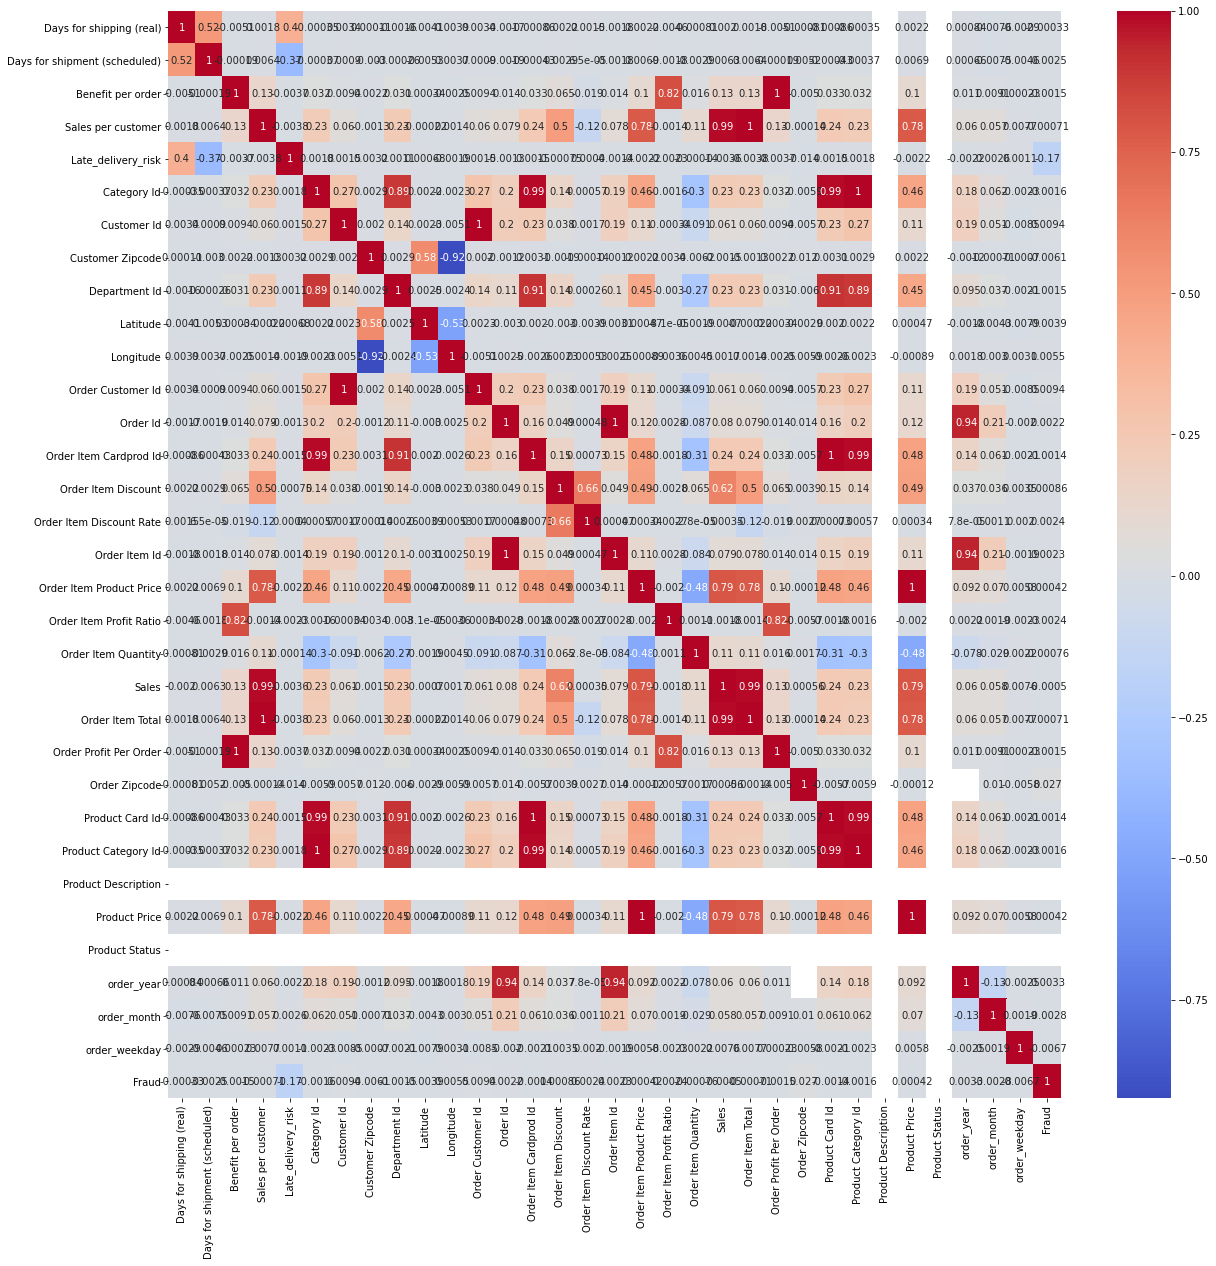

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

In [26]:
# 相关性较高的列, 需要删除
drop_col = ['Order Item Cardprod Id','Sales','Shipping Mode','Order Customer Id','Order Item Total','Order Item Quantity','Product Card Id','Product Category Id', 'Order Profit Per Order','Product Price', 'Order Id']
# 数据不规范 
drop_col += ['Customer Email','order date (DateOrders)', 'shipping date (DateOrders)','Product Status']
# 多余数据
drop_col += ['Customer Fname', 'Customer Lname','Customer Password','Product Image','Latitude', 'Longitude','Product Description','Order Zipcode']
# 标签泄露
drop_col += ['Order Status' ,'Delivery Status']
drop_col

['Order Item Cardprod Id',
 'Sales',
 'Shipping Mode',
 'Order Customer Id',
 'Order Item Total',
 'Order Item Quantity',
 'Product Card Id',
 'Product Category Id',
 'Order Profit Per Order',
 'Product Price',
 'Order Id',
 'Customer Email',
 'order date (DateOrders)',
 'shipping date (DateOrders)',
 'Product Status',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Product Image',
 'Latitude',
 'Longitude',
 'Product Description',
 'Order Zipcode',
 'Order Status',
 'Delivery Status']

In [27]:
train_data.drop(drop_col,axis=1,inplace=True)
len(train_data.columns)

33

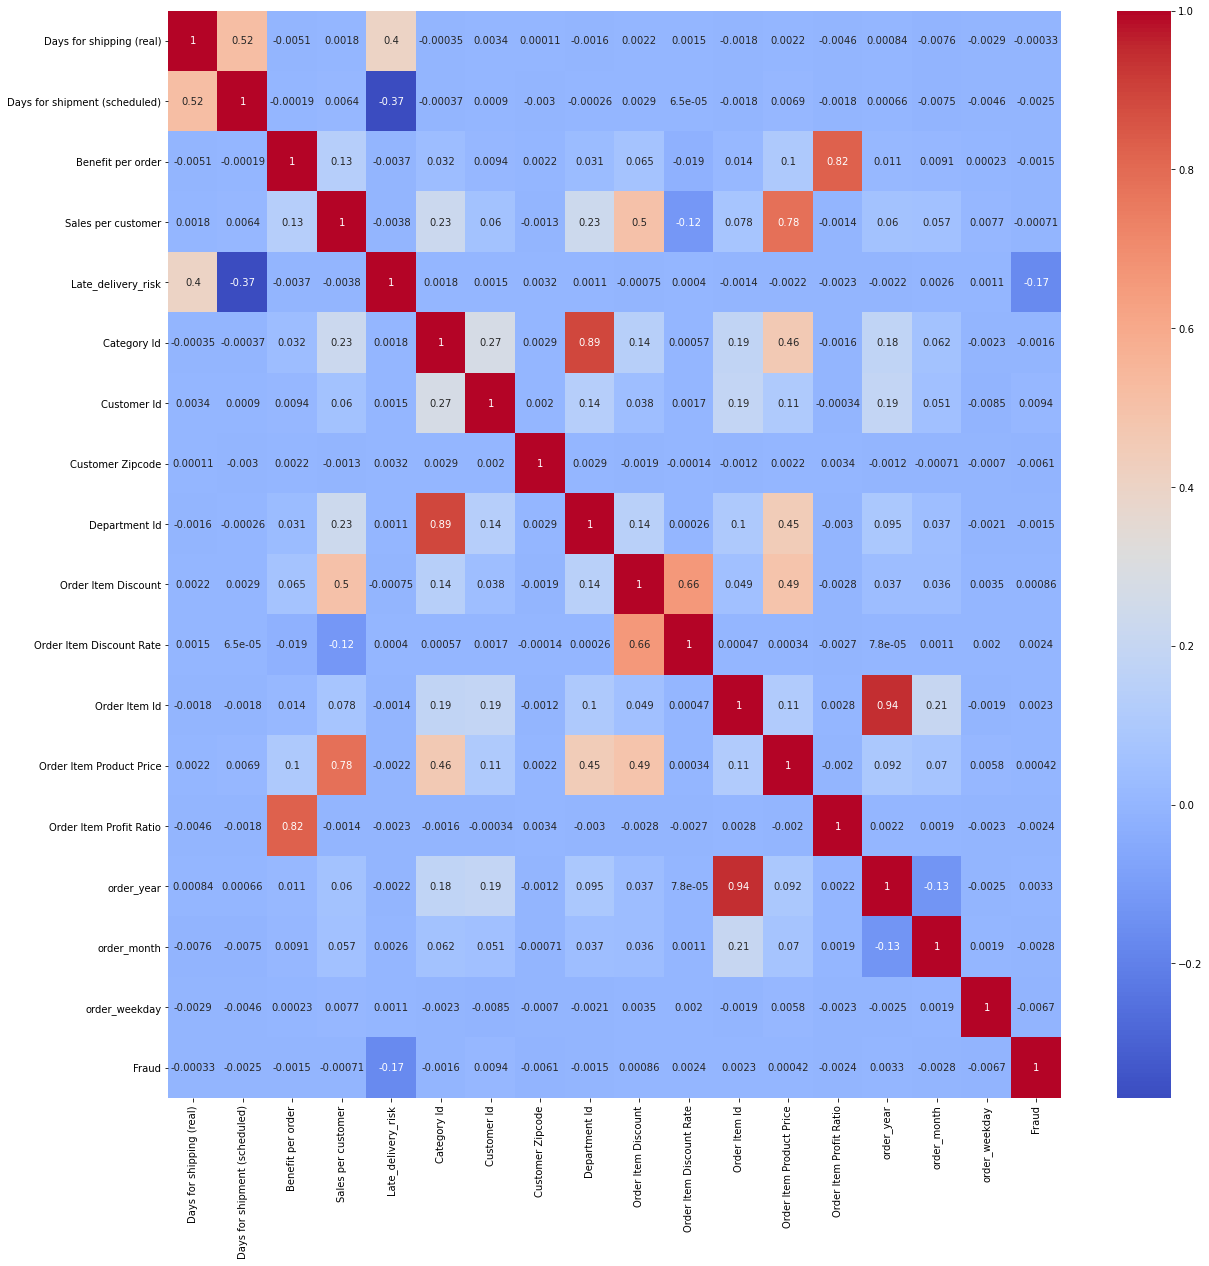

In [28]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

## 类别特征转换

In [29]:

cat_col = [i for i in train_data.select_dtypes(object).columns]

# 类别转化为数值
for col in cat_col:
    lbl = LabelEncoder()
    train_data[col] = lbl.fit_transform(train_data[col].astype(str))

In [30]:

x_fraud = train_data.loc[:, train_data.columns!='Fraud']
y_fraud = train_data['Fraud']

x_late = train_data.loc[:, train_data.columns!='Late_delivery_risk']
y_late = train_data['Late_delivery_risk']


x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test = train_test_split(x_fraud,y_fraud,test_size=0.2)

x_late_train,x_late_test,y_late_train,y_late_test = train_test_split(x_late,y_late,test_size=0.2)


## 数据规范化

In [31]:

from sklearn.preprocessing import StandardScaler
# 数据规范化
ss = StandardScaler()
x_fraud_train = ss.fit_transform(x_fraud_train)
x_fraud_test = ss.transform(x_fraud_test)


x_late_train = ss.fit_transform(x_late_train)
x_late_test = ss.transform(x_late_test)

## 构造分类模型函数

In [58]:

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,f1_score


def model_status(model, x_train,x_test, y_train,y_test, name='fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    recall = recall_score(y_pred,y_test)
    confusion = confusion_matrix(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print('模型:',model)
    print('{}准确率:{}'.format(name, accuracy))
    print('{}召回率:{}'.format(name, recall))
    print('{}混淆矩阵:{}'.format(name, confusion))
    print('{}F1值:{}'.format(name, f1))
    temp = {'model':model,'task':name,'accuracy':accuracy,'recall':recall,'f1':f1}
    global result
    result = result.append(temp,ignore_index=True)
    return accuracy, recall, f1

In [59]:
result = pd.DataFrame(columns = ['model','task','accuracy','recall','f1'])
result

,model,task,accuracy,recall,f1


## 比较不同的分类模型

### 逻辑回归

In [60]:
from sklearn.linear_model import LogisticRegression

model_fraud = LogisticRegression()
model_late = LogisticRegression()

acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')

模型: LogisticRegression()
fraud准确率:0.9781464657655662
fraud召回率:0.6036585365853658
fraud混淆矩阵:[[35216    65]
 [  724    99]]
fraudF1值:0.2006079027355623
模型: LogisticRegression()
late准确率:0.9885885220474185
late召回率:0.979667374031486
late混淆矩阵:[[15841   412]
 [    0 19851]]
lateF1值:0.9897292715760084


### GaussianNB

In [62]:
from sklearn.naive_bayes import GaussianNB

model_fraud = GaussianNB()
model_late = GaussianNB()

acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')

模型: GaussianNB()
fraud准确率:0.8805395524041657
fraud召回率:0.16024143302180685
fraud混淆矩阵:[[30968  4313]
 [    0   823]]
fraudF1值:0.27622084242322537
模型: GaussianNB()
late准确率:0.5727066253046754
late召回率:0.5627019672317025
late混淆矩阵:[[  826 15427]
 [    0 19851]]
lateF1值:0.7201654301728674


### XGBClassifier

In [63]:

model_fraud = xgb.XGBClassifier()
model_late = xgb.XGBClassifier()

acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')

模型: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
fraud准确率:0.9900842011965433
fraud召回率:0.9159212880143113
fraud混淆矩阵:[[35234    47]
 [  311   512]]
fraudF1值:0.7409551374819102
模型: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
    

### SVM

In [64]:

# SVM模型
model_fraud = svm.LinearSVC()
model_late = svm.LinearSVC()
# 模型评估
acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')



模型: LinearSVC()
fraud准确率:0.9776756038112121
fraud召回率:0.5841584158415841
fraud混淆矩阵:[[35239    42]
 [  764    59]]
fraudF1值:0.1277056277056277
模型: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
late准确率:0.9918014624418346
late召回率:0.9853079863006899
late混淆矩阵:[[15957   296]
 [    0 19851]]
lateF1值:0.9925996299814991


### KNeighborsClassifier()

In [65]:

# KNN模型
model_fraud = KNeighborsClassifier(n_neighbors=1)
model_late = KNeighborsClassifier(n_neighbors=1)
# 模型评估
acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')




模型: KNeighborsClassifier(n_neighbors=1)
fraud准确率:0.9772601373808997
fraud召回率:0.5015625
fraud混淆矩阵:[[34962   319]
 [  502   321]]
fraudF1值:0.4388243335611757
模型: KNeighborsClassifier(n_neighbors=1)
late准确率:0.8115444272102814
late召回率:0.8367315335776596
late混淆矩阵:[[13090  3163]
 [ 3641 16210]]
lateF1值:0.826534774627779


### LDA模型 

In [66]:

# LDA模型
model_fraud = LinearDiscriminantAnalysis()
model_late = LinearDiscriminantAnalysis()
# 模型评估
acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')


模型: LinearDiscriminantAnalysis()
fraud准确率:0.9792543762463993
fraud召回率:0.574
fraud混淆矩阵:[[35068   213]
 [  536   287]]
fraudF1值:0.4338624338624338
模型: LinearDiscriminantAnalysis()
late准确率:0.9595889652116109
late召回率:0.9315344908493665
late混淆矩阵:[[14794  1459]
 [    0 19851]]
lateF1值:0.9645538252229051


### 决策树模型

In [67]:

# 决策树模型
model_fraud = tree.DecisionTreeClassifier()
model_late = tree.DecisionTreeClassifier()
# 模型评估
acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')



模型: DecisionTreeClassifier()
fraud准确率:0.9897518280522933
fraud召回率:0.7674144037780402
fraud混淆矩阵:[[35084   197]
 [  173   650]]
fraudF1值:0.778443113772455
模型: DecisionTreeClassifier()
late准确率:0.9928816751606471
late召回率:0.9939995966115369
late混淆矩阵:[[16134   119]
 [  138 19713]]
lateF1值:0.9935236751253685


### 随机森林模型

In [68]:

# 随机森林模型
model_fraud = RandomForestClassifier()
model_late = RandomForestClassifier(n_estimators=100, max_depth=10)
# 模型评估
acc,recall,f1 = model_status(model_fraud,x_fraud_train,x_fraud_test,y_fraud_train,y_fraud_test,name='fraud')
acc1,recall1,f11 = model_status(model_late,x_late_train,x_late_test,y_late_train,y_late_test,name='late')


模型: RandomForestClassifier()
fraud准确率:0.9890593840017726
fraud召回率:0.9776785714285714
fraud混淆矩阵:[[35271    10]
 [  385   438]]
fraudF1值:0.6892210857592447
模型: RandomForestClassifier(max_depth=10)
late准确率:0.9528307112785287
late召回率:0.9209891435464415
late混淆矩阵:[[14550  1703]
 [    0 19851]]
lateF1值:0.9588697017268446


In [85]:
result

,model,task,accuracy,recall,f1
0,LogisticRegression(),fraud,0.978146,0.603659,0.200608
1,LogisticRegression(),late,0.988589,0.979667,0.989729
2,GaussianNB(),fraud,0.880540,0.160241,0.276221
3,GaussianNB(),late,0.572707,0.562702,0.720165
4,"XGBClassifier(base_score=0.5, booster='gbtree'...",fraud,0.990084,0.915921,0.740955
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",late,0.991801,0.985308,0.992600
6,LinearSVC(),fraud,0.977676,0.584158,0.127706
7,"XGBClassifier(base_score=0.5, booster='gbtree'...",late,0.991801,0.985308,0.992600
8,KNeighborsClassifier(n_neighbors=1),fraud,0.977260,0.501563,0.438824
9,KNeighborsClassifier(n_neighbors=1),late,0.811544,0.836732,0.826535


In [79]:
x_fraud_train.shape

(144415, 32)

### 使用神经网络进行分类

In [80]:


import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# BN层在每个batch上将前一层的激活值重新规范化，即使得其输出数据的均值接近0，其标准差接近1
keras.layers.BatchNormalization()
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(1024, activation='relu',kernel_initializer='random_normal', input_dim=32)) #Since we have 44 columns
#Third Hidden Layer
classifier.add(Dense(512, activation='relu',kernel_initializer='random_normal'))
#Fourth Hidden Layer
classifier.add(Dense(256, activation='relu',kernel_initializer='random_normal'))
#Fifth Hidden Layer
classifier.add(Dense(128, activation='relu',kernel_initializer='random_normal'))
#Sixth Hidden Layer
classifier.add(Dense(64, activation='relu',kernel_initializer='random_normal'))
#Seventh Hidden Layer
classifier.add(Dense(32, activation='relu',kernel_initializer='random_normal'))
#Eight Hidden Layer
classifier.add(Dense(16, activation='relu',kernel_initializer='random_normal'))
#Ninth Hidden Layer
classifier.add(Dense(8, activation='relu',kernel_initializer='random_normal'))
#Tenth Hidden Layer
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
#Eleventh Hidden Layer
classifier.add(Dense(2, activation='relu',kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))


In [81]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# 模型训练
classifier.fit(x_fraud_train,y_fraud_train, batch_size=512, epochs=10)


Epoch 1/10
283/283 [==============================] - 13s 46ms/step - loss: 0.2518 - accuracy: 0.9770
Epoch 2/10
283/283 [==============================] - 11s 39ms/step - loss: 0.0545 - accuracy: 0.9776
Epoch 3/10
283/283 [==============================] - 11s 39ms/step - loss: 0.0515 - accuracy: 0.9776
Epoch 4/10
283/283 [==============================] - 11s 40ms/step - loss: 0.0488 - accuracy: 0.9776
Epoch 5/10
283/283 [==============================] - 11s 39ms/step - loss: 0.0473 - accuracy: 0.9776
Epoch 6/10
283/283 [==============================] - 11s 40ms/step - loss: 0.0451 - accuracy: 0.9776
Epoch 7/10
283/283 [==============================] - 11s 40ms/step - loss: 0.0438 - accuracy: 0.9776
Epoch 8/10
283/283 [==============================] - 11s 39ms/step - loss: 0.0415 - accuracy: 0.9776
Epoch 9/10
283/283 [==============================] - 11s 40ms/step - loss: 0.0390 - accuracy: 0.9776
Epoch 10/10
283/283 [==============================] - 12s 44ms/step - loss: 0.036

In [82]:

train_evaluate=classifier.evaluate(x_fraud_train, y_fraud_train)
test_evaluate=classifier.evaluate(x_fraud_test, y_fraud_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate)# evaluation of model.
y_fraud_pred_temp=classifier.predict(x_fraud_test,batch_size=512,verbose=1)
y_fraud_pred=np.argmax(y_fraud_pred_temp,axis=1)
print(f1_score(y_fraud_test,y_fraud_pred,average="weighted"))

1129/1129 [==============================] - 3s 3ms/step - loss: 0.0477 - accuracy: 0.9772
accuracy for Train set is [0.03220035508275032, 0.9775716066360474]
accuracy for Test set is [0.04774400219321251, 0.9772047400474548]
71/71 [==============================] - 1s 12ms/step
0.9659385164236689


## 比较不同的回归模型

In [107]:
import pickle 
with open('data.pkl','rb') as file:
    train_data = pickle.load(file)
len(train_data.columns)


57

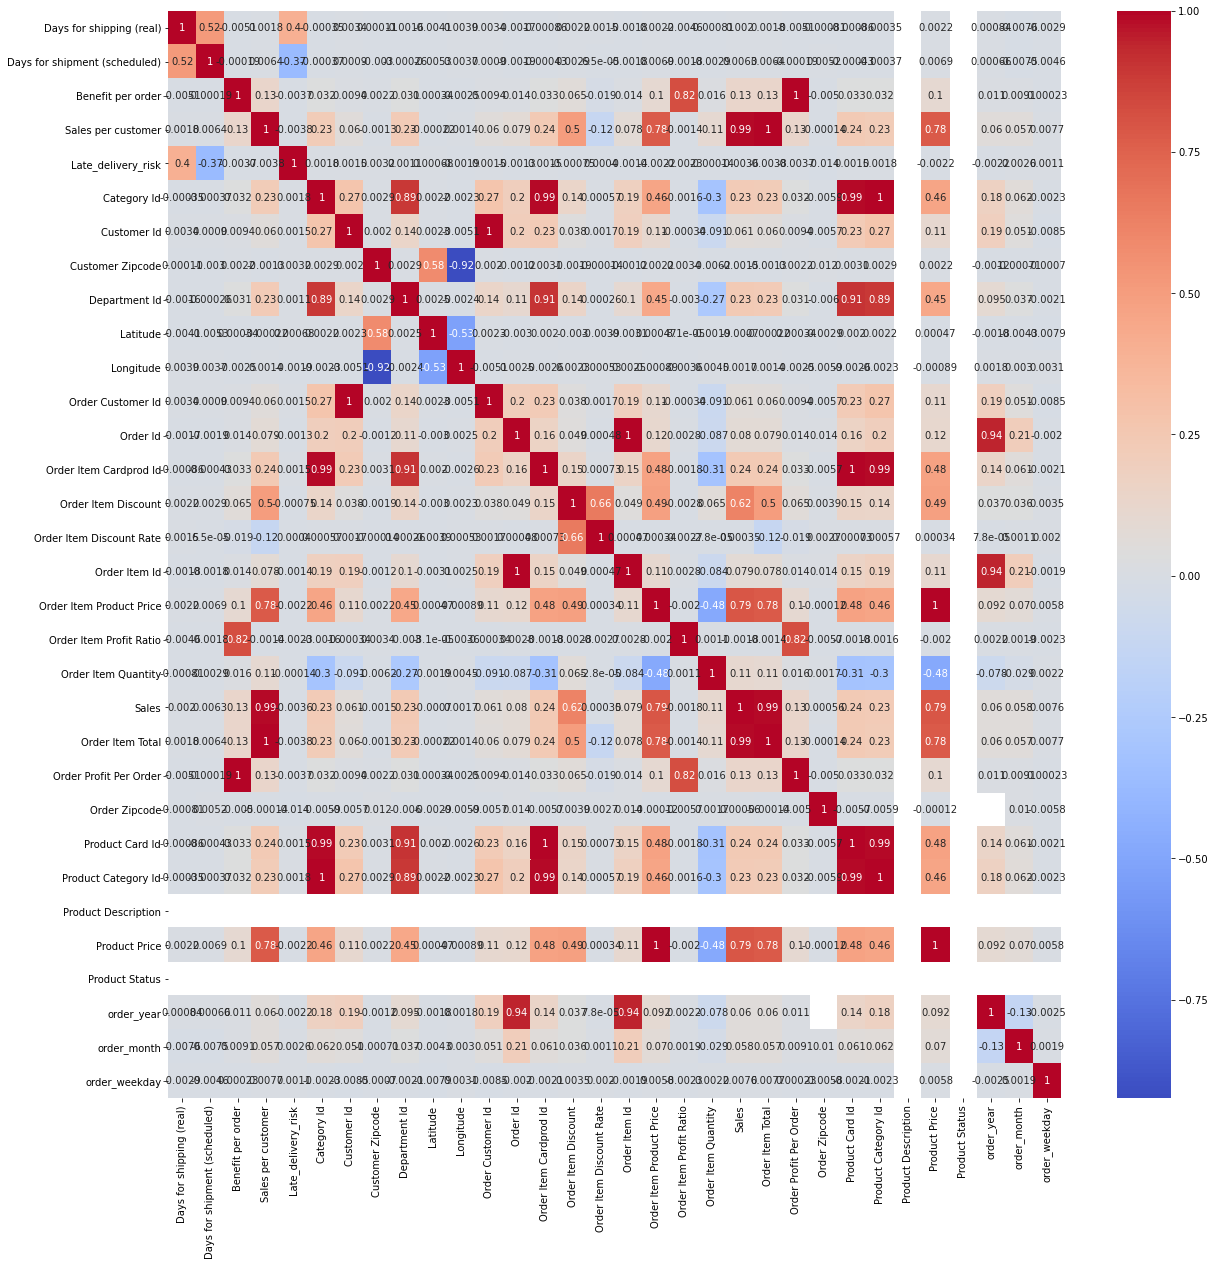

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

In [109]:
# 相关性较高的列, 需要删除
drop_col = ['Order Item Cardprod Id','Sales per customer','Shipping Mode','Order Customer Id','Order Item Total','Product Card Id','Product Category Id', 'Order Profit Per Order','Product Price', 'Order Id']
# 数据不规范 
drop_col += ['Customer Email','order date (DateOrders)', 'shipping date (DateOrders)','Product Status']
# 多余数据
drop_col += ['Customer Fname', 'Customer Lname','Customer Password','Product Image','Latitude', 'Longitude','Product Description','Order Zipcode']
# 标签泄露
drop_col += ['Order Status' ,'Delivery Status']
drop_col

['Order Item Cardprod Id',
 'Sales per customer',
 'Shipping Mode',
 'Order Customer Id',
 'Order Item Total',
 'Product Card Id',
 'Product Category Id',
 'Order Profit Per Order',
 'Product Price',
 'Order Id',
 'Customer Email',
 'order date (DateOrders)',
 'shipping date (DateOrders)',
 'Product Status',
 'Customer Fname',
 'Customer Lname',
 'Customer Password',
 'Product Image',
 'Latitude',
 'Longitude',
 'Product Description',
 'Order Zipcode',
 'Order Status',
 'Delivery Status']

In [110]:

train_data.drop(drop_col,axis=1,inplace=True)
len(train_data.columns)

33

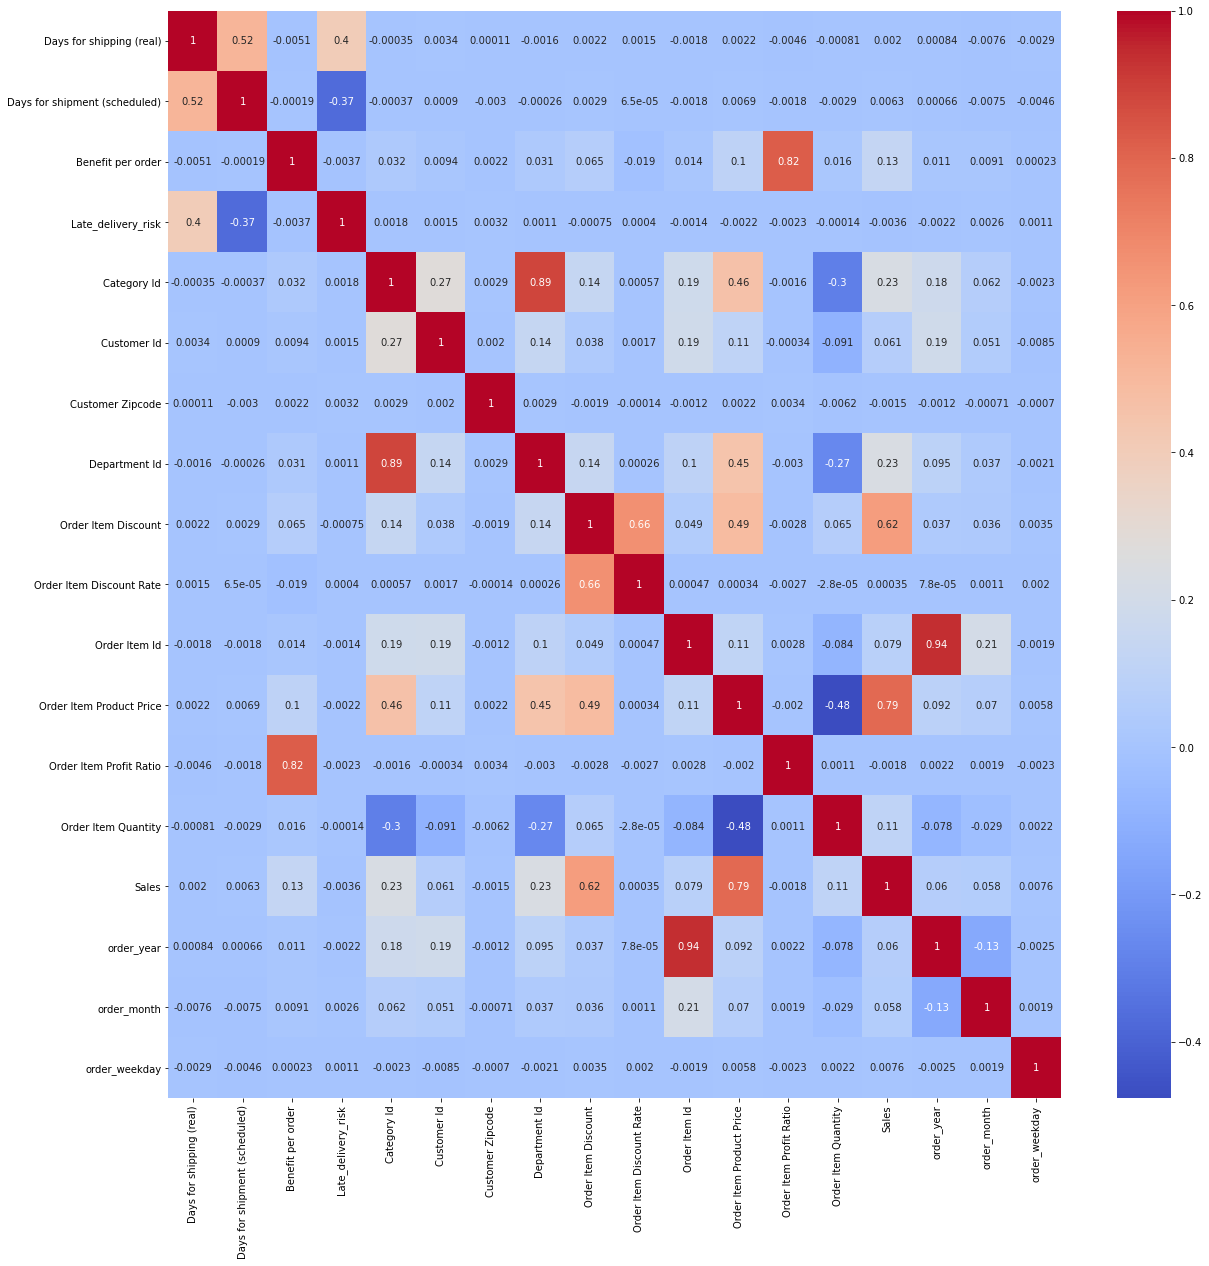

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

In [112]:

cat_col = [i for i in train_data.select_dtypes(object).columns]

# 类别转化为数值
for col in cat_col:
    lbl = LabelEncoder()
    train_data[col] = lbl.fit_transform(train_data[col].astype(str))
    

In [113]:

x_sales = train_data.loc[:, train_data.columns!='Sales']
y_sales = train_data['Sales']

x_quantity = train_data.loc[:, train_data.columns!='Order Item Quantity']
y_quantity = train_data['Order Item Quantity']

x_sales_train,x_sales_test,y_sales_train,y_sales_test = train_test_split(x_sales,y_sales,test_size=0.2)

x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test = train_test_split(x_quantity,y_quantity,test_size=0.2)

In [114]:

from sklearn.preprocessing import MinMaxScaler
# 数据规范化

scaler=MinMaxScaler()
x_sales_train=scaler.fit_transform(x_sales_train)
x_sales_test=scaler.transform(x_sales_test)
x_quantity_train=scaler.fit_transform(x_quantity_train)
x_quantity_test=scaler.transform(x_quantity_test)



In [115]:
regression_result = pd.DataFrame(columns = ['model','MSE','R2'])
regression_result

,model,MSE,R2


In [116]:
from sklearn.metrics import mean_squared_error,r2_score

def model_status(model, x_train,x_test, y_train,y_test, name='fraud'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_pred,y_test)
    r2 = r2_score(y_pred,y_test)
    print('模型:',model)
    print("MSE:",mse)
    print("R2:",r2)
    temp = {'model':str(model),'mse':mse,'r2':r2}
    global regression_result
    regression_result = result.append(temp,ignore_index=True)
    return mse, r2

### 线性回归

In [117]:
from sklearn.linear_model import LinearRegression

model_sales = LinearRegression()
model_quantity = LinearRegression()

mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')


模型: LinearRegression()
MSE: 958.0076263727195
R2: 0.9383309969860475
模型: LinearRegression()
MSE: 0.2746084731110428
R2: 0.8489651632841813


### 决策树

In [118]:
from sklearn.tree import DecisionTreeRegressor

model_sales = DecisionTreeRegressor(max_leaf_nodes = 5)
model_quantity = DecisionTreeRegressor(max_leaf_nodes = 5)

mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')


模型: DecisionTreeRegressor(max_leaf_nodes=5)
MSE: 3399.616855344609
R2: 0.7402811735615699
模型: DecisionTreeRegressor(max_leaf_nodes=5)
MSE: 0.2907273762796551
R2: 0.8395017504073314


### 岭回归

In [120]:
### Ridge Regression
model_sales = Ridge(alpha=1.0)
model_quantity = Ridge(alpha=1.0)
# 模型评估

mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')



模型: Ridge()
MSE: 958.5842074293329
R2: 0.9381059604034432
模型: Ridge()
MSE: 0.2748520241180097
R2: 0.8466579884586081


### XGBRegressor

In [122]:

model_sales = xgb.XGBRegressor()
model_quantity = xgb.XGBRegressor()

mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')


模型: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MSE: 0.005848167781277707
R2: 0.9999996468343287
模型: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_esti

### LGBM

In [121]:

model_sales = lgb.LGBMRegressor()
model_quantity = lgb.LGBMRegressor()


mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')


模型: LGBMRegressor()
MSE: 4.220464159215918
R2: 0.999744935540526
模型: LGBMRegressor()
MSE: 5.262676381166779e-06
R2: 0.9999975153973595


### 随机森林

In [123]:
model_sales = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
model_quantity = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=40)
# 模型评估
mse,r2 = model_status(model_sales,x_sales_train,x_sales_test,y_sales_train,y_sales_test,name='sales')
mse1,r21 = model_status(model_quantity,x_quantity_train,x_quantity_test,y_quantity_train,y_quantity_test,name='quantity')


模型: RandomForestRegressor(max_depth=10, random_state=40)
MSE: 0.017286315955976666
R2: 0.9999989561146982
模型: RandomForestRegressor(max_depth=10, random_state=40)
MSE: 3.7391978728118754e-07
R2: 0.9999998234938113


### 使用神经网络进行回归分析

In [125]:

# 使用神经网络进行回归分析
regressor = Sequential()

#First Hidden Layer
regressor.add(Dense(512, activation='relu',kernel_initializer='normal',input_dim=32))
#Second  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Third  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fourth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))
#Fifth  Hidden Layer
regressor.add(Dense(256, activation='relu',kernel_initializer='normal'))

#Output Layer
regressor.add(Dense(1, activation='linear'))# Linear activation is used.

In [126]:

# 设置优化器，损失函数
regressor.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
# 模型训练, 可以对epochs进行调整
regressor.fit(x_quantity_train,y_quantity_train, batch_size=256, epochs=10)


Epoch 1/10
565/565 [==============================] - 6s 11ms/step - loss: 0.4434 - mean_absolute_error: 0.4434
Epoch 2/10
565/565 [==============================] - 6s 11ms/step - loss: 0.1488 - mean_absolute_error: 0.1488
Epoch 3/10
565/565 [==============================] - 6s 11ms/step - loss: 0.1167 - mean_absolute_error: 0.1167
Epoch 4/10
565/565 [==============================] - 7s 12ms/step - loss: 0.1026 - mean_absolute_error: 0.1026
Epoch 5/10
565/565 [==============================] - 7s 12ms/step - loss: 0.0847 - mean_absolute_error: 0.0847
Epoch 6/10
565/565 [==============================] - 6s 11ms/step - loss: 0.0861 - mean_absolute_error: 0.0861
Epoch 7/10
565/565 [==============================] - 7s 12ms/step - loss: 0.0781 - mean_absolute_error: 0.0781
Epoch 8/10
565/565 [==============================] - 6s 11ms/step - loss: 0.0641 - mean_absolute_error: 0.0641
Epoch 9/10
565/565 [==============================] - 6s 11ms/step - loss: 0.0608 - mean_absolute_error:

In [127]:

# 对订单数量进行预测，并统计训练集、测试集MAE, RMSE
pred_quantity_train= regressor.predict(x_quantity_train)
pred_quantity_test= regressor.predict(x_quantity_test)
print('MAE Value train data:',regressor.evaluate(x_quantity_train, y_quantity_train))
print('RMSE of train data:',np.sqrt(mean_squared_error(y_quantity_train, pred_quantity_train)))
print('MAE Value test data:',regressor.evaluate(x_quantity_test,y_quantity_test))
print('RMSE of test data:',np.sqrt(mean_squared_error(y_quantity_test, pred_quantity_test)))


4513/4513 [==============================] - 8s 2ms/step - loss: 0.0374 - mean_absolute_error: 0.0374
MAE Value train data: [0.037413589656353, 0.037413589656353]
RMSE of train data: 0.1290762136073122
1129/1129 [==============================] - 2s 2ms/step - loss: 0.0379 - mean_absolute_error: 0.0379
MAE Value test data: [0.03789684921503067, 0.03789684921503067]
RMSE of test data: 0.13264467453568152
